In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read files

In [2]:
df_tc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/telecallers.csv')
df_tc = df_tc.rename(columns = {'id': 'telecallerId'})
df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_lc.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z


In [3]:
## convert timestamsp to datetime format
df_lc['calledAt'] = pd.to_datetime(df_lc['calledAt'])
df_lc['createdAt'] = pd.to_datetime(df_lc['createdAt'])


In [4]:
## create a binary column where if the lead joined, value = 1 else value =0
df_lc['statusNum'] = np.where(df_lc['status']=='Joined', 1, 0)

## find total leads converted by telecaller by taking groupby on telecallerId and sum
## and totalLeads by taking groupby on telecallerId and count

df_effectiveness = pd.merge(df_lc.groupby(by = ['telecallerId'], as_index = False).sum(), 
                     df_lc.groupby(by = ['telecallerId'], as_index = False).count()[['telecallerId', 'statusNum']],\
                    on = 'telecallerId', how = 'left').rename(columns = {'statusNum_x' : 'leadsConverted',
                                                     'statusNum_y' : 'totalLeads'})

In [5]:
df_effectiveness['effectiveness'] = df_effectiveness['leadsConverted']/df_effectiveness['totalLeads']

In [20]:
## telecaller's name for visualisation

df_effectiveness = pd.merge(df_effectiveness, df_tc[['telecallerId', 'name']], on = 'telecallerId', how = 'left')
df_effectiveness = df_effectiveness.drop(['telecallerId'], axis = 1)

## set name as index
df_effectiveness = df_effectiveness.set_index('name').reset_index(drop = False)

In [21]:
df_effectiveness

,name,leadsConverted,totalLeads,effectiveness
0,Amila,35,3206,0.010917
1,Rakshith,7,359,0.019499
2,Sheeba,72,8770,0.008210


## Effectiveness based on status of initial call
#### if the initial response by the lead was +ve/-ve or neutral

In [7]:
'''
Divide responses in three categories: +ve, -ve and neutral
Currently this was done manually
This is being done to gauge the effectiveness of telecallers given the sentiment of the first call
'''

negativeStatus = ['Not Sure',
                'Not Interested', "Don't Meet Requirements",
                'Not Interested - Got Other Jobs', 'Not sure', 'RNR',
                'Not Interested - Location Issue', 'Not Interested - Not Applied',
                'Not Interested - Disconnected the Call',
                'Language Barrier',
                'Want Non-Delivery Jobs',
                'Not Interested - Call Back', 'Disconnected the Call',
                'Not Interested - Others', 
                'Not Interested - Applied by Mistake',
                'Applied by Mistake', 'Other Reasons',
                'Not Interested - Wrong Number', 'Call Back', 'Location Issue',
                'Not Interested - Not Sure',
                'Not Interested - Want Jobs in Other Company (but same category)',
                'Not Interested - Want Jobs in Other Category', 'Not interested',
                'Applied for Someone Else',
                'Not Interested - Want Non-Delivery Jobs',
                'Number Not Valid/Number Does Not Exist',
                'Not Interested but Referred Someone',
                'Disconnected the call',
                'Want Other Delivery Jobs', 
                'Switched Off/Not Reachable/No Incoming Up',
                'Not Interested - Want Other Delivery Jobs', 'Location issue','Applied by mistake',
]
positiveStatus = ['Very Interested', 'Interested', 
                  'Interested and Referred Someone',
                  'Interested but in village',
                  'Interested but RNR on Follow-up',
                  'Interested but CNP on Follow-up', 
                  'Interested but in village'
                 ]


def get_status_sentiment(df):
    if df['status'] in negativeStatus:
        return 'negative'
    elif df['status'] in positiveStatus:
        return 'positive'
    else:

        return 'neutral'

In [8]:
## read lead calls csv

df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_lc.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z


In [9]:
## sort on ['telecallerId', 'leadId', 'createdAt'] in descending order to find the first call record

df_lc = df_lc.sort_values(by = ['telecallerId', 'leadId', 'createdAt'], ascending = False).reset_index(drop = True)
df_lc['statusSentiment'] = df_lc.apply(get_status_sentiment, axis = 1)
df_lc.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,statusSentiment
0,c20dcd9f-d764-4cd7-8df1-3b8be9f44c07,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fff62584-cb37-49ff-8df2-b193431f0804,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-06-01T10:30:00Z,2019-12-26T17:26:37.952Z,neutral
1,7844544b-65be-4ac5-885f-a79776623ab7,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffe620cf-727b-4e2a-a201-ec2505b0f93f,Zomato,Not Sure,He will call back,2020-05-01T10:30:00Z,2019-12-26T17:22:25.176Z,negative
2,ec8321f0-a3ba-4ce3-ab5a-f94e2102f52a,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffdf0149-30e1-4ef6-8a3d-666717527548,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-05-01T10:30:00Z,2019-12-26T17:22:25.130Z,neutral
3,fe632b13-d291-48e7-879c-be3e57b6cb7c,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffdcc8e7-2cff-42ce-9647-093a03449b91,Zomato,Not Applied,NaN,2020-06-01T10:30:00Z,2019-12-26T17:26:38.222Z,neutral
4,7e12f7eb-7f86-4ba8-82e7-cc9029f2b38e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffd81592-acac-421c-9440-e955f633d2fd,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-07-30T12:30:00Z,2019-12-26T17:31:26.281Z,neutral


In [10]:
## dropping duplciates to keep on the first call record

df_first_call = df_lc.drop_duplicates(subset = ['telecallerId' , 'leadId'], keep = 'first').\
                        reset_index(drop = True)
df_first_call = df_first_call.rename(columns = {'statusSentiment' : 'firstCallStatus'})
df_first_call.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,firstCallStatus
0,c20dcd9f-d764-4cd7-8df1-3b8be9f44c07,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fff62584-cb37-49ff-8df2-b193431f0804,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-06-01T10:30:00Z,2019-12-26T17:26:37.952Z,neutral
1,7844544b-65be-4ac5-885f-a79776623ab7,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffe620cf-727b-4e2a-a201-ec2505b0f93f,Zomato,Not Sure,He will call back,2020-05-01T10:30:00Z,2019-12-26T17:22:25.176Z,negative
2,ec8321f0-a3ba-4ce3-ab5a-f94e2102f52a,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffdf0149-30e1-4ef6-8a3d-666717527548,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-05-01T10:30:00Z,2019-12-26T17:22:25.130Z,neutral
3,fe632b13-d291-48e7-879c-be3e57b6cb7c,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffdcc8e7-2cff-42ce-9647-093a03449b91,Zomato,Not Applied,NaN,2020-06-01T10:30:00Z,2019-12-26T17:26:38.222Z,neutral
4,7e12f7eb-7f86-4ba8-82e7-cc9029f2b38e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,ffd81592-acac-421c-9440-e955f633d2fd,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-07-30T12:30:00Z,2019-12-26T17:31:26.281Z,neutral


In [11]:
## add the first call data to the leads call dataframe

df_lc = pd.merge(df_lc, df_first_call[['telecallerId', 'leadId', 'firstCallStatus']] ,\
                                      on = ['telecallerId', 'leadId'], how  = 'left')



In [12]:
## create three dataframes based on the sentiment of the first call

df_positive = df_lc[df_lc['firstCallStatus'] == 'positive'].reset_index(drop = True)
df_negative = df_lc[df_lc['firstCallStatus'] == 'negative'].reset_index(drop = True)
df_neutral = df_lc[df_lc['firstCallStatus'] == 'neutral'].reset_index(drop = True)

In [13]:
## create a binary column where if lead joined, value =1 or else 0

df_positive['statusNum'] = np.where(df_positive['status']=='Joined', 1, 0)

## groupby on telecallerId as sum and count to get leadsConverted and totalLeads
## and join them to get all the data in a single dataframe
df_positive_effect = pd.merge(df_positive.groupby(by = ['telecallerId'], as_index = False).sum(), 
                     df_positive.groupby(by = ['telecallerId'], as_index = False).count()[['telecallerId', 'statusNum']],\
                    on = 'telecallerId', how = 'left').rename(columns = {'statusNum_x' : 'leadsConverted',
                                                     'statusNum_y' : 'totalLeads'})
## adding telecaller name and setting index on name

df_positive_effect = pd.merge(df_positive_effect, df_tc[['telecallerId', 'name']], on = 'telecallerId', how = 'left')
df_positive_effect = df_positive_effect.drop(['telecallerId'], axis = 1)
df_positive_effect = df_positive_effect.set_index('name').reset_index(drop = False)

In [14]:
df_positive_effect['+ve_effectiveness'] = df_positive_effect['leadsConverted']/df_effectiveness['totalLeads']
df_positive_effect

,name,leadsConverted,totalLeads,+ve_effectiveness
0,Amila,0,342,0.0
1,Rakshith,0,82,0.0
2,Sheeba,0,599,0.0


In [15]:
## create a binary column where if lead joined, value =1 or else 0
df_negative['statusNum'] = np.where(df_negative['status']=='Joined', 1, 0)

## groupby on telecallerId as sum and count to get leadsConverted and totalLeads
## and join them to get all the data in a single dataframe
df_negative_effect = pd.merge(df_negative.groupby(by = ['telecallerId'], as_index = False).sum(), 
                     df_negative.groupby(by = ['telecallerId'], as_index = False).count()[['telecallerId', 'statusNum']],\
                    on = 'telecallerId', how = 'left').rename(columns = {'statusNum_x' : 'leadsConverted',
                                                     'statusNum_y' : 'totalLeads'})

## adding telecaller name and setting index on name

df_negative_effect = pd.merge(df_negative_effect, df_tc[['telecallerId', 'name']], on = 'telecallerId', how = 'left')
df_negative_effect = df_negative_effect.drop(['telecallerId'], axis = 1)
df_negative_effect = df_negative_effect.set_index('name').reset_index(drop = False)

In [16]:
df_negative_effect['-ve_effectiveness'] = df_negative_effect['leadsConverted']/df_effectiveness['totalLeads']
df_negative_effect

,name,leadsConverted,totalLeads,-ve_effectiveness
0,Amila,1,1572,0.000312
1,Rakshith,0,165,0.000000
2,Sheeba,1,4126,0.000114


In [17]:
## create a binary column where if lead joined, value =1 or else 0

df_neutral['statusNum'] = np.where(df_neutral['status']=='Joined', 1, 0)

## groupby on telecallerId as sum and count to get leadsConverted and totalLeads
## and join them to get all the data in a single dataframe
df_neutral_effect = pd.merge(df_neutral.groupby(by = ['telecallerId'], as_index = False).sum(), 
                     df_neutral.groupby(by = ['telecallerId'], as_index = False).count()[['telecallerId', 'statusNum']],\
                    on = 'telecallerId', how = 'left').rename(columns = {'statusNum_x' : 'leadsConverted',
                                                     'statusNum_y' : 'totalLeads'})

## adding telecaller name and setting index on name

df_neutral_effect = pd.merge(df_neutral_effect, df_tc[['telecallerId', 'name']], on = 'telecallerId', how = 'left')
df_neutral_effect = df_neutral_effect.drop(['telecallerId'], axis = 1)
df_neutral_effect = df_neutral_effect.set_index('name').reset_index(drop = False)

In [18]:
df_neutral_effect['neutral_effectiveness'] = df_neutral_effect['leadsConverted']/df_effectiveness['totalLeads']
df_neutral_effect

,name,leadsConverted,totalLeads,neutral_effectiveness
0,Amila,34,1292,0.010605
1,Rakshith,7,112,0.019499
2,Sheeba,71,4045,0.008096


In [25]:
## merge effectiveness from all the three dataframes into a single dataframe

df_final = pd.merge(df_effectiveness[['name', 'effectiveness']], df_positive_effect[['name', '+ve_effectiveness']], \
                    on = 'name', how = 'left')

df_final = pd.merge(df_final[['name', 'effectiveness', '+ve_effectiveness']], \
                    df_negative_effect[['name', '-ve_effectiveness']], on = 'name', how = 'left')

df_final = pd.merge(df_final[['name', 'effectiveness', '+ve_effectiveness', '-ve_effectiveness']], \
                    df_neutral_effect[['name', 'neutral_effectiveness']], on = 'name', how = 'left')

In [57]:
df_final

,name,effectiveness,+ve_effectiveness,-ve_effectiveness,neutral_effectiveness
0,Amila,1.091703,0.0,0.031192,1.060512
1,Rakshith,1.949861,0.0,0.000000,1.949861
2,Sheeba,0.820981,0.0,0.011403,0.809578


In [78]:
## melt dataframe for plotting a multiple barplot
df_melt = df_final.melt('name', var_name='a', value_name='b')

In [79]:
df_melt

,name,a,b
0,Amila,effectiveness,1.091703
1,Rakshith,effectiveness,1.949861
2,Sheeba,effectiveness,0.820981
3,Amila,+ve_effectiveness,0.000000
4,Rakshith,+ve_effectiveness,0.000000
5,Sheeba,+ve_effectiveness,0.000000
6,Amila,-ve_effectiveness,0.031192
7,Rakshith,-ve_effectiveness,0.000000
8,Sheeba,-ve_effectiveness,0.011403
9,Amila,neutral_effectiveness,1.060512


In [46]:
df_final.columns

Index(['name', 'effectiveness', '+ve_effectiveness', '-ve_effectiveness',
       'neutral_effectiveness'],
      dtype='object')

In [47]:
num_columns = ['effectiveness', '+ve_effectiveness', '-ve_effectiveness','neutral_effectiveness']
for col in num_columns:
    df_final[col] = 100*df_final[col]

<Figure size 1296x864 with 0 Axes>

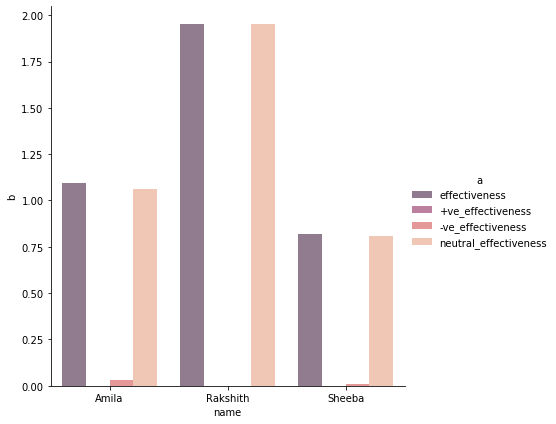

In [81]:
plt.figure(figsize=(18,12))
sns.factorplot(data = df_melt, kind="bar",
    x="name", y="b", hue = 'a',
    ci="sd", palette="rocket", alpha=.6, height=6
)
plt.show()